# Introduction à `PyTorch`.

## Introduction aux calculs matricielles, réseaux neuronaux, et au GPU.
PyTorch est une bibliothèque de machine learning open-source largement utilisée pour le calcul
tensoriel et la construction de réseaux neuronaux. Elle est appréciée dans le domaine de
l'apprentissage profond en raison de sa flexibilité et de sa facilité d'utilisation, en particulier
pour le calcul matriciel et la gestion efficace des GPU.

### 1. Calcul matricielle avec `PyTorch`.
Le calcul matriciel est fondamental pour les algorithmes de machine learning, car les données et
les poids des modèles sont souvent représentés sous forme de matrices. PyTorch facilite la
manipulation de ces matrices via l'objet Tensor, qui est l'équivalent générique d'un tableau
multidimensionnel.

Voici quelque opérations de base avec des tenseurs :

- Création de tenseurs, les tenseurs peuvent être créer à partir de listes, de numpy arrays, ou en initialisant des valeurs.
- Opération sur les tenseurs, vous pouvez effectuer des opérations arithmétiques, des produits de matriciels, des transpositions, etc...

### 2. Réseaux neuronnaux avec `PyTorch`.
La construction de réseaux neuronnaux se fait généralement en définissant une classe personalisé qui héride de //. Voici un exemple simple d'un réseau neuronal.

In [24]:
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

### 3. Utilisation des `GPU`.

`PyTorch` permet de tirer parti de la puissance des GPU pour accélerer le calcul. Les tenseurs et modèles, peuvent être déplacés vers le GPU en utilisant la méthode ou. Voici comment vous pouvez déplacer un tenseur et un modèle vers le GPU.

In [4]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# tensor = tensor.to(device)
# model = model.to(device)

## Conclusion.

`PyTorch` est un puissant outil pour le calcul matriciel et la construction de réseaux neuronaux, offrant une API intuitive, et la possibilité de développer, des modèles efficacement avec le soutien du calcul GPU. Grâce à sa flexibilité et ses capacités éprouvées dans le domaine de l'apprentisage profond, `PyTorch` est devenue un choix privilégier pour les chercheurs et les praticiens. La compréhension du calculs matriciel, des réseaux neuronnaux et de l'utilisation des GPU, est essentielle, pour tirer des capacité de `PyTorch` dans le dévellopement de modèles d'apprentissage automatique avancés.

## Exemple, de classification d'images.

Nous allons apprendre à utiliser `PyTorch` pour créer un modèle de classification d'images, avec le jeu de données `CIFAR-10`.

### Importation des bibliothèques nécessaires.

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt

# vérification de la version de pytorch
print(f"pytorch version -> {torch.__version__}")

pytorch version -> 1.13.1+cu117


- `torch` : La bibliothèques principal de PyTorch pour manipuler des tenseurs, et construire des modèles de machine learning.
- `torch.nn` : Fournit des modules pour construire des modèles de réseaux de neurones.
- `torch.optium` : Contient des algorithmes d'optimisations comme `SGD` et `Adam`.
- `torchvision.datatsets` : Contient des jeux de données populaires préchargés, comme `CIFAR-10` et `MNIST`.
- `torchvision.transofmrs` : Fournit des transformations pour prétraiter les données (par exemple, normalisation).
- `torch.utils.data.DataLoader` : Crée des itérateurs pour charger les données par lots.

### Chargement et prétraitement du jeu de données `CIFAR-10`.

Pour charger les données `CIFAR-10`, nous utilisons `torchvision.datasets` et appliquons des transformations comme la normalisations.

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalisation entre -1 et 1
])

# chargement des données d'entrainement et de test
train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

# création des dataloaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"taille du jeu d'entraînement : {len(train_dataset)}")
print(f"taille du jeu test : {len(test_dataset)}")

Files already downloaded and verified
Files already downloaded and verified
taille du jeu d'entraînement : 50000
taille du jeu test : 10000


- `transforms.Compose` : Combine plusieurs transformations, comme la conversion en tenseur et la normalisation.
    - `transforms.ToTensor()` : Convertit une image `PIL` ou `NumPy` en tenseur `PyTorch`.
    - `transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))` : Normalise les pixels des images dans la plage `[-1,1]`.
- `datasets.CIFAR10` : Charge le jeu de données `CIFAR-10`, qui contient 60 000 images (50 000 pour l'entraînement, et 10 000 pour le test).
- `DataLoader` : Créer un gestionnaire de données, pour parcourir les données par lots.
    - `batch_size=64` : Chaque lot contient 64 images, ce qui réduit la mémoire requise et acélérent l'entraînement.
    - `shuffle=True` : Mélange aléatoirement les données à chaque époque, ce qui aide à éviter le surapprentissage, en rendant le modèle moins dépendant, de l'ordre des données.
    
### Visualisations des données.

Affichons quelque exemples d'images, pour comprendre les données.

labels : [4 5 5 2 1 2 7 0 4 2]


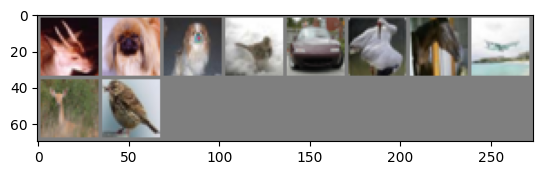

In [7]:
def imshow(img):
    img = img / 2 + 0.5 # Dénormalisations.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# affichage d'un lot d'images
examples = iter(train_loader)
example_data, example_targets = next(examples)
print(f"labels : {example_targets[:10].numpy()}")
imshow(make_grid(example_data[:10]))

- `imshow(img)`: Fontion qui dénormalise et affiche une image.
- `torchvision.utils.make_grid`: Combine plusieurs images en une grille.
- `example_data`: Un lot d'image trié au `DataLoader`.
- `example_targets`: Les labels associés aux images.

### Construction du modèle de classification.

Nous définissions un réseau neuronal convolutif (CNN) simple.

In [27]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# instanciation du modèle
mode1 = CNN()
print(mode1)

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


- `nn.Conv2D` : Couche de convolution qui applique des filtres pour extraire des caractéristiques.
    - 3 : Nombre de canaux d'entrée (image RGB).
    - 32 : Nombre de filtres (ou cartes de caractéristiques).
    - `kernel_size=3` : taille du filtre (3x3 pixels).
    - `stride=1` : Nombre de pixels entre les applications du filtres.
    - `padding=1` : Ajoute un pixel autour des images pour conserver leur taille.
- `nn.MaxPool2D` : Réduit la taille des images en prenant le maximum dans chaque région 2x2.
- `nn.Linear` : Couche dense connectant tous les neurones d'une couche aux suivants.
- `torch.rellu` : Fonction d'activation qui introduit de la non-linéartité dans le modèle.

### Définition de la fonction de perte et de l'optimiseur.

Nous utilisons la fonction de perte `CrossEntropyLoss` et l'optimiseur `Adam`.

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mode1.parameters(), lr=0.001)

- `nn.CrossEntropyLoss` : Mesure l'erreur entre les prédictions du modèle et les labels vrais.
- `optim.Adam` : Algrithme d'optimisation adaptatif.
    - `lr=0.001` : Taux d'apprentissage, qui contrôle la vitesse de mise à jour des poids.

### Entraînements du modèle.

Nous entraînons le modèle sur les données d'entraînement.

In [10]:
n_epochs = 5
for epoch in range(n_epochs):
    print(f"\n---début de l'époque {epoch + 1}/{n_epochs}---")
    mode1.train()
    running_loss = 0.0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        # rénitialisation des gradients
        optimizer.zero_grad()
        
        # propagation avant
        outputs = mode1(images) # passe les images à travers le réseau pour produire des prédictions
        
        # vérifiez si un redimensionnement est nécessaire
        if outputs.shape[0] != labels.shape[0]:
            print(f"mismatch detected : outputs shape {outputs.shape[0]} vs labels shape {labels.shape[0]}")
            min_batch_size = min(outputs.shape[0], labels.shape[0])
            outputs = outputs[:min_batch_size]
            labels = labels[:min_batch_size]
            
        # calcul de la perte
        loss = criterion(outputs, labels)
        
        # rétropropagation et mise à jour des poids
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # affiche périodiquement l'état d'avancement
        if batch_idx % 10 == 0:
            print(f"bacth {batch_idx + 1}/{len(train_loader)}, perte : {loss.item():.4f}")
            
    print(f"---fin de l'époque {epoch + 1}/{n_epochs}, perte moyenne : {running_loss / len(train_loader):.4f} ---")


---début de l'époque 1/5---
mismatch detected : outputs shape 256 vs labels shape 64
bacth 1/782, perte : 2.2990
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 11/782, perte : 2.2894
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mi

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 141/782, perte : 2.3110
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 151/782, perte : 2.3029
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 281/782, perte : 2.3044
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 291/782, perte : 2.3054
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 421/782, perte : 2.3052
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
b

bacth 551/782, perte : 2.3069
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 561/782, perte : 2.3055
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 691/782, perte : 2.3025
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 701/782, perte : 2.3043
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 51/782, perte : 2.3027
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mi

mismatch detected : outputs shape 256 vs labels shape 64
bacth 181/782, perte : 2.3034
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 191/782, perte : 2.3028
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 321/782, perte : 2.3035
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 331/782, perte : 2.3042
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 461/782, perte : 2.3195
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 471/782, perte : 2.3054
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 601/782, perte : 2.3043
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

mismatch detected : outputs shape 256 vs labels shape 64
bacth 731/782, perte : 2.3006
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 741/782, perte : 2.3032
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 91/782, perte : 2.3021
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 101/782, perte : 2.3044
mismatch detected : outputs s

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 231/782, perte : 2.3026
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

mismatch detected : outputs shape 256 vs labels shape 64
bacth 361/782, perte : 2.3015
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 371/782, perte : 2.3031
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 501/782, perte : 2.3012
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 511/782, perte : 2.2992
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 641/782, perte : 2.3026
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 651/782, perte : 2.3046
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 781/782, perte : 2.3007
mismatch detected : outputs shape 64 vs labels shape 16
---fin de l'époque 3/5, perte moyenne : 2.3029 ---

---début de l'époque 4/5---
mismatch detected : outputs shape 256 vs labels shape 64
bacth 1/782, perte : 2.3033
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 131/782, perte : 2.3019
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 141/782, perte : 2.3027
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 271/782, perte : 2.3024
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 281/782, perte : 2.3027
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 411/782, perte : 2.3040
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
b

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 551/782, perte : 2.3036
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

bacth 681/782, perte : 2.3054
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 691/782, perte : 2.3041
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 41/782, perte : 2.3012
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 51/782, perte : 2.3022
mismatch detected : outputs sh

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 181/782, perte : 2.3032
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 321/782, perte : 2.3043
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 451/782, perte : 2.3030
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 461/782, perte : 2.3024
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 591/782, perte : 2.2999
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 601/782, perte : 2.3009
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs 

mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
bacth 731/782, perte : 2.3025
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
mismatch detected : outputs shape 256 vs labels shape 64
m

- `mode1.train()` : Met le modèle en mode antraînement (activant par exemple les couches dropout).
- `outputs = mode1(images)` : Effectue une propagation avant en passant lesnimages à travers le réseau pourproduire des prédictions.
- `optimizer.zero_grad()` : Rénitialise les gradients avant la rétropropagation.
- `loss.backward()` : Calcule les gradients des poids par rapport à la perte.
- `optimizer.step()` : Met à jour les poids en fonction des gradients calculés.

### Évaluation sur le jeu de test.

Nous évaluons les performances du modèle sur les données de test.

In [11]:
mode1.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        print(f"\nbatch {batch_idx + 1}/{len(test_loader)}:")
        print(f"images shape: {images.shape}, labels shape : {labels.shape}")
        
        # propagation avant
        outputs = mode1(images)
        print(f"outputs shape : {outputs.shape}")
        
        # obtenir les prédictions
        _, predicted = torch.max(outputs, 1)
        print(f"predicted shape: {predicted.shape}")
        
        # redimensionnement des labels pour garantir la compatibilité
        labels = labels.view(-1)
        print(f"adjusted labels shape : {labels.shape}")
        
        # ajuste predicted ou labels si leurs tailles diffèrent
        if predicted.shape[0] != labels.shape[0]:
            print(f"mismatch detected : predicted {predicted.shape[0]} vs labels {labels.shape[0]}")
            predicted = predicted[:labels.shape[0]]
            
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(f"batch accuracy : {(predicted == labels).sum().item() / labels.size(0):.2f}")
        
print(f"\nprécision sur le jeu de test : {100 * correct / total:.2f}%")


batch 1/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.05

batch 2/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.11

batch 3/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.05

batch 4/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape 

outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.09

batch 32/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.09

batch 33/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.09

batch 34/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.0

outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.12

batch 63/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.11

batch 64/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.06

batch 65/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.0


batch 94/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.05

batch 95/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.03

batch 96/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.14

batch 97/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels sh


batch 126/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.17

batch 127/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.08

batch 128/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted labels shape : torch.Size([64])
mismatch detected : predicted 256 vs labels 64
batch accuracy : 0.08

batch 129/157:
images shape: torch.Size([64, 3, 32, 32]), labels shape : torch.Size([64])
outputs shape : torch.Size([256, 10])
predicted shape: torch.Size([256])
adjusted label

- `mode1.eval()` : met le modèle en mode évaluation (par exemple, désactive le dropout).
- `torch.no_grad()` : Désactive le calcul des gradients pour gagner en mémoire et en vitesse.
- `torch.mac(outputs, 1)` : Trouve les classes avec la probabilité la plus élevée.
    
## 1. Compréhension de la précision.

La précision représente le pourcentage d'images correctement classées parmi l'ensemble des images de test. Une précision de 10.01% signifie que seulement environ 10% des images de test on été correctement classées.

Dans le jeu de données `CIFAR-10`, il y a 10 classes. Une précision de 10% correspond à une performance équivalente à un choix aléatoire : si le modèle devine une classe au hasard, il a 1 chance sur 10 (10 %) de tomber juste.

## 2. Causes possibles d'une faible précision - Problème avec l'entraînement.

- Trop peu d'époques ou de mises des poids. Taux d'apprentissage (lr) inadéquat : soit trop bas (entraînement lent), soit trop élevé (divergence). le modèle n'est pas suffisamment complexe pour capturer les caractéristiques des images. Mauvais prétraitements des donnnées.

- Les images ou labels pourraient ne pas être corretement normalisées ou alignés. Si les labels ou données sont incorrects, le modèle n'apprend pas correctement. Architecture inappropriée.

- Un réseau neuronal trop simple ou inadapté (par exemple, trop peu de couches ou de filtres). Absence de mécanismes essentiels, comme la régularisation ou une fonction d'activation appropriée. Problème dans les données d'entrée.

- Mauvais dimensionnement ou arreurs dans les données. Les données de test pourraient ne pas correspondre aux données d'entraînement (par exemple, différents prétraitements appliqués). Sur-apprentissage aléatoires.

- Si les poids sont initalisée de manière inappropriée ou si l'entraînement ne converge pas, le modèle peut simplement donner des prédictions aléatoires.

## 3. Actions pour améliorer la précision.

1. Augmenter la complexité du modèle :
    - Ajouter plus de couches convolutionnelles ou des neurones dans les couches denses.
    - Ajouter des techniques comme le dropout ou la batch normalisation.
2. Augmenter le nombre d'époques :
    - Entraînez le modèle pendant plus d'époques pour permettre une meilleur convergence.
3. Vérifier le prétraitement des données :
    - Assurez-vous que les images sont correctement normlisées avec les mêmes statistiques (moyenne et écart-type).
    - Vérifiez que les labels sont correctement alignés avec les données.
4. Ajuster le taux d'apprentissage :
    - Essayer des taux d'apprentissage différents, comme 0.0001, 0.01, ou utilisez un plan de déclin du taux d'apprentissage.
5. Entraînement supervisé :
    - Assurez-vous que les gradients sont bien calculés et que la fonction perte diminue au cours de l'entraînement.
6. Inspecter les données d'entraînements et de test :
    - Affichez un échantillon des données pour vérifier leur cohérence (par exemple, utilisez imshow() pour visualiser des exemples).
    
### Analyse des résultats.

Affichons quelques prédictions incorrectes.

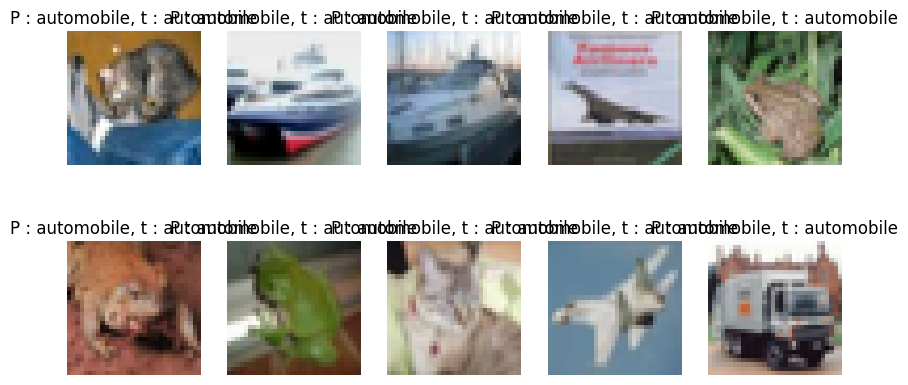

In [17]:
incorrect_samples = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = mode1(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                incorrect_samples.append((images[i], predicted[i].item(), labels[i].item()))
                
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(10, 5))

for i, (img, pred, true) in enumerate(incorrect_samples[:10]):
    img = img / 2 + 0.5 # Dénormalisation
    npimg = img.numpy()
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"P : {class_names[pred]}, t : {class_names[True]}")
    plt.axis("off")
plt.show()

- `incorrect_samples` : contient les images mal classées avec leurs prédictions et vrais labels.
- `plt.subplot(2, 5, i+1)`:crée une grille de 2 lignes et 5 colonnes pour afficher les erreurs.

## Scipt modèle retreci et sauvegarde.

pytorch version : 1.13.1+cu117
Files already downloaded and verified
Files already downloaded and verified
taille du jeu d'entraînement : 50000
taille du jeu de test : 10000
labels : [0 7 5 2 1 3 7 9 2 9]


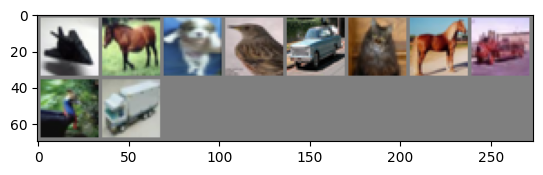

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
--- debut de l'époque 1/5 ---
mismatch detected : outputs shape 256 vs labels shape 64
bacth 1/2, perte : 2.2975
mismatch detected : outputs shape 144 vs labels shape 36
---fin de l'époque 1/5, perte moyenne : 2.2865---
--- debut de l'époque 2/5 ---
mismatch detected : outputs shape 256 vs labels shape 64
bacth 1/2, perte : 2.2523
mismatch detected : outputs shape 144 vs labels shape 36
---fin de l'époque 2/5, perte moyenne : 2.2359---
--- debut de l'époque 3/5 ---
mismatch detected : outputs shape 256 vs labels shape 64
bacth 1/2, perte : 2.2099
mismatch detected : outputs shape 144 vs labels shape 36
---fin de l'époque 3/

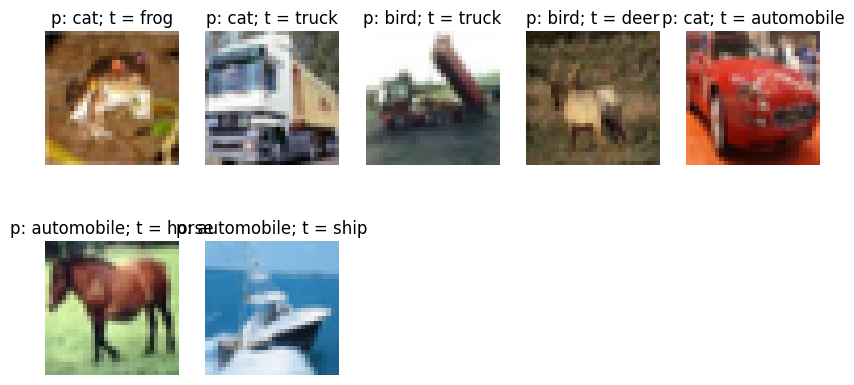

modèle sauvegardé sous 'model_cnn.pth'


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Subset

# vérification de la version de pytorch
print(f"pytorch version : {torch.__version__}")

# transformation des donées
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # normalisation entre -1 et 1
])

# chargement des données d'entraînement et de test
train_dataset = datasets.CIFAR10(root="./data", train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root="./data", train=False, transform=transform, download=True)

# sous-échantiollonage des 1000 premières images
train_subset = Subset(train_dataset, list(range(100)))
test_subset = Subset(train_dataset, list(range(10)))

# création des dataloaders
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_subset, batch_size=64, shuffle=False)

print(f"taille du jeu d'entraînement : {len(train_dataset)}")
print(f"taille du jeu de test : {len(test_dataset)}")

def imshow(img):
    img = img / 2 + 0.5 # dénormalisation
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# affichage d'un lot d'images
examples = iter(train_loader)
example_data, example_targets = next(examples)
print(f"labels : {example_targets[:10].numpy()}")
imshow(make_grid(example_data[:10]))

# définition du modèle CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
# instanciation du modèle
mode1 = CNN()
print(mode1)

# définition de la fonction de perte et de l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mode1.parameters(), lr=0.001)

n_epochs = 5
for epoch in range(n_epochs):
    print(f"--- debut de l'époque {epoch + 1}/{n_epochs} ---")
    mode1.train()
    running_loss = 0.0
    
    for batch_idx, (images, labels) in enumerate(train_loader):
        # rénitialisation des gradients
        optimizer.zero_grad()
        # propagation avant
        outputs = mode1(images) # passe les images à travers le réseau pour produire des prédictions
        
        # vérifiez si un redimensionnement est nécessaire
        if outputs.shape[0] != labels.shape[0]:
            print(f"mismatch detected : outputs shape {outputs.shape[0]} vs labels shape {labels.shape[0]}")
            min_batch_size = min(outputs.shape[0], labels.shape[0])
            outputs = outputs[:min_batch_size]
            labels = labels[:min_batch_size]
            
        # calcul de la perte
        loss = criterion(outputs, labels)
        
        # rétropropagation et mise à jour des poids
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # affichage périodiquement l'état d'avancement
        if batch_idx % 10 == 0:
            print(f"bacth {batch_idx + 1}/{len(train_loader)}, perte : {loss.item():.4f}")
            
    print(f"---fin de l'époque {epoch+1}/{n_epochs}, perte moyenne : {running_loss/len(train_loader):.4f}---")
    
mode1.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch_idx, (images, labels) in enumerate(test_loader):
        print(f"\nbatch {batch_idx+1}/{len(test_loader)}:")
        print(f"images shape : {images.shape}, labels shape : {labels.shape}")
        
        # propagation avant
        outpus = mode1(images)
        print(f"outputs shape : {outputs.shape}")
        
        # obtenir les prédictions
        _, predicted = torch.max(outputs, 1)
        print(f"predicted shape : {predicted.shape}")
        
        # rédimensionnement des labels pour garantir la compatibilité
        labels = labels.view(-1)
        print(f"adjusted labels shape : {labels.shape}")
        
        # ajuste predicted ou labels si leurs tailles diffèrent
        if predicted.shape[0] != labels.shape[0]:
            print(f"mismatch detected : predicted {predicted.shape[0]} vs labels {labels.shape[0]}")
            predicted = predicted[:labels.shape[0]]
            
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        print(f"batch accuracy : {(predicted == labels).sum().item() / labels.size(0):.2f}")
        
print(f"/nprécsion sur le jeu de test : {100 * correct / total:.2f}%")


# visualisation des erreurs
incorrect_samples = []
with torch.no_grad():
    for images, labels in test_loader:
        outputs = mode1(images)
        _, predicted = torch.max(outputs, 1)
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                incorrect_samples.append((images[i], predicted[i].item(), labels[i].item()))
                
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
plt.figure(figsize=(10, 5))
for i, (img, pred, true) in enumerate(incorrect_samples[:10]):
    img = img / 2 + 0.5 # dénormalisation
    npimg = img.numpy()
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"p: {class_names[pred]}; t = {class_names[true]}")
    plt.axis("off")
plt.show()

# sauvegarder uniquement les paramètre du modèle
torch.save(mode1.state_dict(), "model.cnn.pth")
print("modèle sauvegardé sous 'model_cnn.pth'")